# Handout Praktikum Sistem Embedded
## Topik 6: Face Detection
---

# 1. Pendahuluan
Pernahkah kalian berpikir bagaimana cara Snapchat bekerja? Bagaimana bisa Snapchat bisa mendeteksi wajah lalu menambahkan fitur AR berupa bermacam-macam mask? Atau mungkin cara dasar kamera yang mampu mendeteksi wajah? Handout ini setidaknya memberikan jawaban untuk kalian.

Diharapkan pada akhir praktikum, kalian sudah mengenali cara kerja _face detection_ secara umum dengan mengaplikasikannya pada sistem embedded berbasis Raspberry Pi. Tentu kalian bisa mengembangkan topik ini lebih lanjut seperti _face recognition_ (mampu melabeli antar wajah) serta _object detection_ apapun yang kalian inginkan.

---

# 2. Instalasi

Pertama-tama kalian harus instalasi beberapa _package_ penting ke dalam mesin kalian (baik di LAPTOP kalian maupun RASPBERRY PI kalian). Praktikum nanti akan ada 2 tahap, tahap pertama kalian coba di laptop, tahap kedua kalian coba di raspberry pi. Package yang penting yang harus kalian instal adalah:
- `numpy`: pemrosesan aljabar linear
- `opencv`: paket primadona untuk topik ini :D
- `matplotlib`: buat plot _image_

## Install `numpy`

Baik untuk OS MS Windows maupun Linux caranya sama, buka cmd prompt (atau terminal di Linux) lalu ketik `pip install numpy`

## Install `opencv`

Untuk yang satu ini rada susah, jadi mending ikutin tutorial di website berikut ini.
- Windows: http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_setup/py_setup_in_windows/py_setup_in_windows.html
- Linux: http://www.pyimagesearch.com/2016/10/24/ubuntu-16-04-how-to-install-opencv/

## Install `matplotlib`

Baik untuk OS MS Windows maupun Linux caranya sama, buka cmd prompt (atau terminal di Linux) lalu ketik `pip install matplotlib`

## Check package

Pastikan bahwa package-nya sudah terinstal! Caranya adalah sebagai berikut.
- Buka cmd prompt (atau terminal di Linux) lalu buka Python Interpreter (biasanya ketik `python` gini cukup)
- Setelah itu, coba ketik `import numpy`, jika tidak ada error maka instalasi berhasil!
- Hal yang sama juga berlaku untuk `opencv` (`import cv2`) dan `matplotlib` (`import matplotlib.pyplot as plt`)

---

# 3. Face Detection

Saya harap jika kalian sudah membaca sampai sini, itu berarti kalian berhasil menginstal semua package dengan benar. Selamat, selamat, selamat! (Notes: asisten kalian ini bisa berjam-jam ngutak-atik terminal linux cuman buat install `opencv` ==").

## Machine Vision Diagram

Berikut ini adalah diagram MV secara umum.

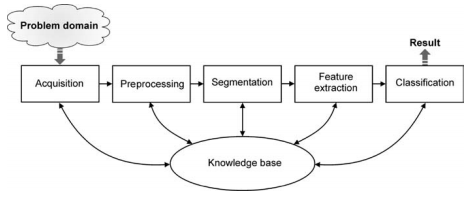

In [1]:
from IPython.display import Image
Image("SistemMachine Vision.PNG")

Diagram tersebut sering digunakan untuk segala jenis sistem MV, termasuk pula untuk _face recognition_ topik ini. Berikut ini adalah penjelasannya.
1. `Aquisition`: bagian ini bertanggungjawab dalam menghasilkan data _image_. Salah satu sistem yang paling banyak dipakai adalah kamera dengan outputnya berupa citra RGB.
2. `Preprocessing`: bagian ini bertanggungjawab dalam merapikan data yang dihasilkan bagian sebelumnya. Terkadang kamera yang dipakai memiliki banyak _noise_, sehingga kita perlu memperbaikinya agar data tersebut menjadi berguna.
3. `Segmentation`: bagian ini bertanggunjawab dalam memfokuskan bagian mana yang penting dan bagian mana yang kurang-penting. Dengan demikian, pemrosesan pada bagian selanjutnya tidak memakan waktu yang lama.
4. `Feature extraction`: bagian ini bertanggungjawab dalam menghasilkan fitur-fitur yang mendefinisikan obyek yang penting.
5. `Classification`: bagian ini bertanggungjawab dalam mengambil keputusan atas fitur-fitur yang sudah dihasilkan tadi.

## Code

Tanpa perlu basa-basi lagi, berikut ini adalah source-code _face detection_ untuk satu buah citra. Jalankan pada laptop kalian masing-masing!

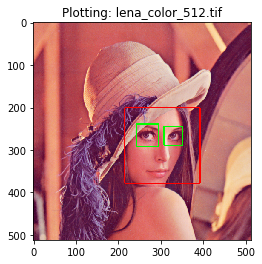

In [6]:
"""
    Source Code 1
    Face Detection on a Single Image
"""

import cv2
import matplotlib as plt
from pylab import *

file_name = "lena_color_512.tif"

# read image
img = cv2.imread(file_name)

# atur ulang posisi kanal
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ambil database wajah
face_cascade = cv2.CascadeClassifier('C:\\opencv3\\build\\etc\\haarcascades\\haarcascade_frontalface_default.xml')

# ambil database mata
eye_cascade = cv2.CascadeClassifier('C:\\opencv3\\build\\etc\\haarcascades\\haarcascade_eye.xml')

# deteksi wajah
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# perulangan untuk setiap wajah yang ditemukan
for (x, y, w, h) in faces:
    # gambar kotak
    cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    # deteksi mata
    eyes = eye_cascade.detectMultiScale(roi_gray)
    # perulangan untuk setiap mata yang ditemukan
    for (ex,ey,ew,eh) in eyes:
        # gambar kotak
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

# plot citra
imshow(img)
title("Plotting: " + file_name)
show()

Berikut ini adalah diagram cara kerja program di atas:

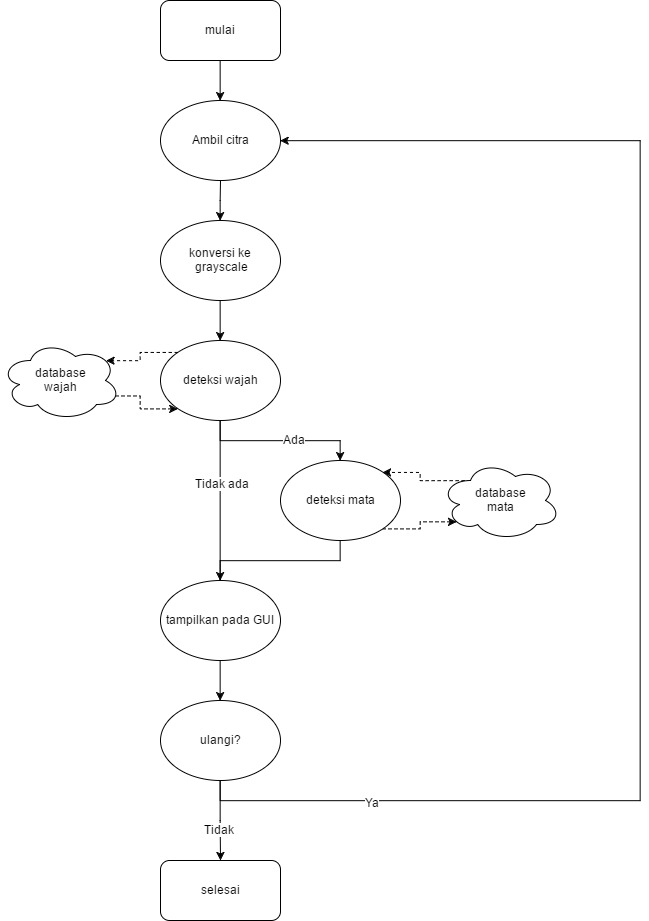

In [5]:
from IPython.display import Image
Image("download.jpg")

Sedikit catatan paga bagian `deteksi mata`. Pada bagian tersebut, terjadi proses `segmentasi` terlebih dahulu, dimana citra utuh yang diambil tadi di-crop menjadi hanya bagian wajahnya saja. Hal ini dilakukan agar proses `feature extraction` maupun proses `classification` tidak menjadi berat. Lagian toh, yang namanya mata kan hanya ada menempel di wajah kita saja bukan. :D

---

# 4. Langkah Praktikum

1. Coba jalankan _source code_ 1 pada laptop kalian masing-masing.
2. Gunakan webcam untuk mendeteksi wajah dan mata secara realtime.
3. Aplikasikan (2) ke dalam Raspberry Pi. Tampilkan pada terminal kalian berapa total wajah yang terdeteksi untuk tiap frame.